In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from matplotlib.legend_handler import HandlerLine2D
import warnings
warnings.filterwarnings('ignore')

X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X, Y)

In [2]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000]
XtS, params = ml.rescale(Xt)
XvS, _ = ml.rescale(Xva, params)

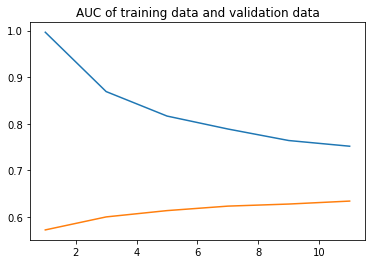

In [3]:
learner = ml.knn.knnClassify()
Ks = [1,3,5,7,9,11]
aucs_t=[]
aucs_v=[]
for i, k in enumerate(Ks):
    learner.train(XtS, Yt, K=k, alpha=0.0)
    auc_t = learner.auc(XtS, Yt) 
    aucs_t.insert(i, auc_t)
    auc_v = learner.auc(XvS, Yva) 
    aucs_v.insert(i, auc_v)

plt.title('AUC of training data and validation data')
plt.plot(Ks, aucs_t)
plt.plot(Ks, aucs_v)
plt.show()

In [5]:
learner = ml.knn.knnClassify()
K = range(1,25,5) 
A = range(0,5,1) 
tr_auc = np.zeros((len(K),len(A))) 
va_auc = np.zeros((len(K),len(A)))
for i,k in enumerate(K): 
    for j,a in enumerate(A):
        learner.train(Xt, Yt, K=k, alpha=a)
        tr_auc[i][j] = learner.auc(Xt, Yt)
        va_auc[i][j] = learner.auc(Xva, Yva)

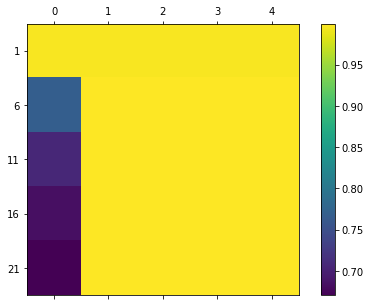

In [6]:
# training data

f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation='nearest') 
f.colorbar(cax)
ax.set_xticklabels(['']+A) 
ax.set_yticklabels(['']+K)
plt.show()

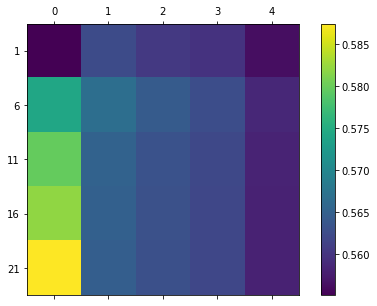

In [7]:
# validation data

f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest') 
f.colorbar(cax)
ax.set_xticklabels(['']+A) 
ax.set_yticklabels(['']+K)
plt.show()